# Analalyse de la distribution du vocabulaire

## Imports et dépendances

### Nettoyage avec spacy

In [17]:
import os
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Télécharger les stopwords si besoin
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Chemin vers ton fichier
path = "../../data/clean_corpus.txt"

with open(path, "r", encoding="utf-8") as f:
    full_text = f.read()

print("Longueur du corpus :", len(full_text), "caractères")


Longueur du corpus : 17770352 caractères


In [19]:
# charger le modèle spacy pour le français
nlp = spacy.load("fr_core_news_lg",disable=["ner","parser","attribute_ruler","tok2vec"])


## Créer une une liste de stopwords

In [20]:
# Stopwords standard + personnalisés
sw = set(stopwords.words("french"))
custom_stopwords = [
    "article", "journal", "reportage", "kb", "texte", "page", "numéro",
    "fait", "faire", "avoir", "être", "dire", "ainsi", "ils", "elle",
    "cela", "cet", "cette", "leurs", "tout", "tous", "aussi", "non",
]
sw |= set(custom_stopwords)
print(f"{len(sw)} stopwords")


178 stopwords


In [21]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

178 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'article', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'c', 'ce', 'cela', 'ces', 'cet', 'cette', 'd', 'dans', 'de', 'des', 'dire', 'du', 'elle', 'en', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'il', 'ils', 'j', 'je', 'journal', 'kb', 'l', 'la', 'le', 'les', 'leur', 'leurs', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'mon', 'même', 'n', 'ne', 'non', 'nos', 'notre', 'nous', 'numéro', 'on', 'ont', 'ou', 'page', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'reportage', 's', 'sa',

## Nettoyage simple

In [22]:
# Supprimer métadonnées, ponctuation et espaces multiples
full_text = re.sub(r'###.*?###', ' ', full_text)  # supprime métadonnées
full_text = re.sub(r'\s+', ' ', full_text)        # unifier les espaces
full_text = re.sub(r'[^\w\s]', '', full_text)     # supprimer ponctuation
full_text = full_text.lower()                     # tout en minuscules


## Tokeniser

In [23]:
# Récupération du contenu du fichier
path = "../../data/clean_corpus.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [24]:
# --- Tokenisation ---
tokens = wordpunct_tokenize(full_text)

# --- Filtrage stopwords et chiffres ---
tokens = [t for t in tokens if t.isalpha() and t not in sw and len(t) > 2]
len(tokens)

1604476

In [25]:
nlp.max_length = len(full_text) + 1000  # ajuster la limite de taille si nécessaire

In [40]:
#augmenter les stopwords en fonction de la fréquence pour affiner le filtrage
# --- Lemmatisation avec spaCy ---
doc = nlp(" ".join(tokens))
lemmas = [token.lemma_.lower() for token in doc if token.lemma_.isalpha()]
fdist = nltk.FreqDist(lemmas)

# par exemple supprimer les 300 mots les plus fréquents
extra_stopwords = {w for w, _ in fdist.most_common(800)}

sw2 = sw | extra_stopwords

# re-filtrage
lemmas_filtered = [w for w in lemmas if w not in sw2]


### regarder mieux les premieer lignes ici: 

1590522 lemmes conservés après nettoyage
20 mots les plus fréquents : [('plus', 9232), ('pouvoir', 6727), ('rue', 5110), ('cest', 5086), ('quil', 4992), ('dun', 4690), ('grand', 4658), ('comme', 4501), ('deux', 4428), ('dune', 4304), ('bien', 4118), ('jour', 3670), ('sans', 3667), ('heure', 3558), ('nouveau', 3421), ('bruxelles', 3379), ('dont', 3374), ('celui', 3226), ('venir', 3026), ('quel', 2992)]


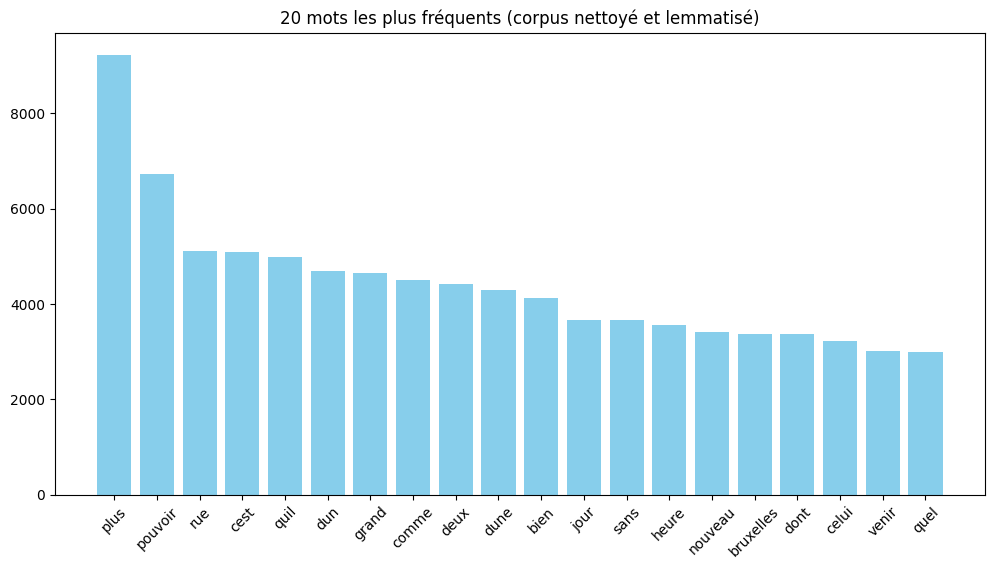

In [48]:
# --- Lemmatisation avec spaCy ---
doc = nlp(" ".join(tokens))
lemmas = [token.lemma_.lower() for token in doc if token.lemma_.isalpha()]
# Filtrage stopwords après lemmatisation
lemmas = [l for l in lemmas if l not in sw and len(l) > 2]

print(f"{len(lemmas)} lemmes conservés après nettoyage")

if lemmas:
    freq = Counter(lemmas)
    most_common = freq.most_common(20)
    print("20 mots les plus fréquents :", most_common)

    words, counts = zip(*most_common)
    plt.figure(figsize=(12,6))
    plt.bar(words, counts, color="skyblue")
    plt.xticks(rotation=45)
    plt.title("20 mots les plus fréquents (corpus nettoyé et lemmatisé)")
    plt.show()
else:
    print("Aucun mot à afficher. Vérifier les filtres ou le corpus.")


In [49]:
words[:10]

('plus',
 'pouvoir',
 'rue',
 'cest',
 'quil',
 'dun',
 'grand',
 'comme',
 'deux',
 'dune')

## Calculer la taille du vocabulaire

In [50]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

20 words kept (20 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [30]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('plus', 9245),
 ('cest', 5099),
 ('quil', 4997),
 ('rue', 4929),
 ('dun', 4692),
 ('comme', 4513),
 ('deux', 4431),
 ('dune', 4294),
 ('bien', 4030),
 ('sans', 3677)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

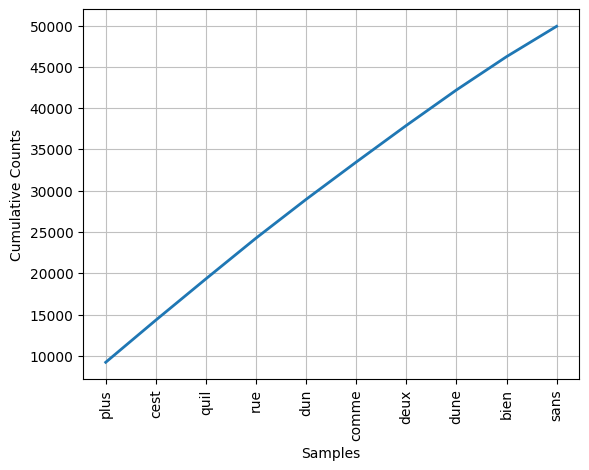

In [31]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [32]:
fdist.hapaxes()[:30]

['mammmmmmm',
 'rœvï',
 'amaa',
 'eotîge',
 'tribunh',
 'scîopero',
 'oarbonifera',
 'boribage',
 'hanmo',
 'avuto',
 'luogo',
 'ponenti',
 'dove',
 'gtandi',
 'mostrato',
 'spirito',
 'monito',
 'tracotanza',
 'padronale',
 'ruonatori',
 'gfànizzanô',
 'manifestaziane',
 'disra',
 'rosea',
 'avvia',
 'quiaregnon',
 'moltitudino',
 'faociei',
 'segni',
 'caratterisitici']

## Trouver les mots les plus longs du corpus

In [33]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiniiiii',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiniiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiniiinniiiiiiiiimi',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
 'iiimimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
 'lllllllllllllllllilllllllmimiiiiilliliflmiiiihimlhlilililmlmtliiiihhmilhlllllllllllllmîhlhf',
 'wkkêkahbasbmsmêbmitbbmkêtbsassssabsêabbgésèsësbmêêmmêmmmimêtiêbéèêêbmtkêtmtêbèmitsgsm',
 'tttntttîmttttttttttuttîttttttîîtîtuîttttttîtîîtîtttttttttttttttîtîîîtîttîttttî',
 'llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'illlllllllllllllllllllllllllllllllllllllllllllllllllllilllllllllllll',
 'tmtttttumuttmmmiitum